In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# first we need to get the data from the txt file 

In [2]:
#gets the path by getting current dir and adding data file
path = os.getcwd() + r'\ex1data1.txt'

In [3]:
#making a pandas data frame out of the file
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#cool pandas function which calculats some basic statistics on the data set
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


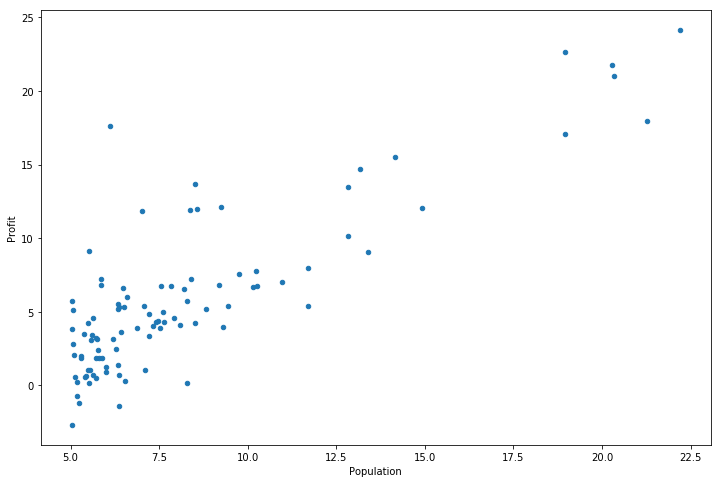

In [5]:
#plot the graph as it is a simple function
#the figsize is just the size of the graph 
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [6]:
#configuring data set to work correctly

#append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

#set X(training data) and y (target variable)
num_cols = data.shape[1]
X = data.iloc[:,0:num_cols-1]
y = data.iloc[:,num_cols-1:num_cols]



In [2]:
#making data numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

NameError: name 'np' is not defined

In [1]:
X

NameError: name 'X' is not defined

In [8]:
#creating the cost function
def compute_cost(X,y, theta):
    inner = np.power(((X*theta.T)-y), 2)
    return np.sum(inner) / (2*len(X))


In [9]:
#trying out cost function
compute_cost(X, y, theta)

32.072733877455676

In [14]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

In [17]:
#gradient descent function
def gradient_descent(X, y, theta, alpha, iters):
    #creates a matrix for new theta with the same dimensions
    temp = np.matrix(np.zeros(theta.shape))
    #gets the number of parameters alt: theta.shape[1]
    num_parameters = int(theta.ravel().shape[1])
    #creates a array of all cost function values
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(num_parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/ len(X)) * np.sum(term))
        theta = temp
        cost[i] = compute_cost(X, y, theta)
        
    return theta, cost

In [18]:
# perform gradient descent to "fit" the model parameters
g, cost =gradient_descent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [19]:
compute_cost(X,y,g)

4.5159555030789118

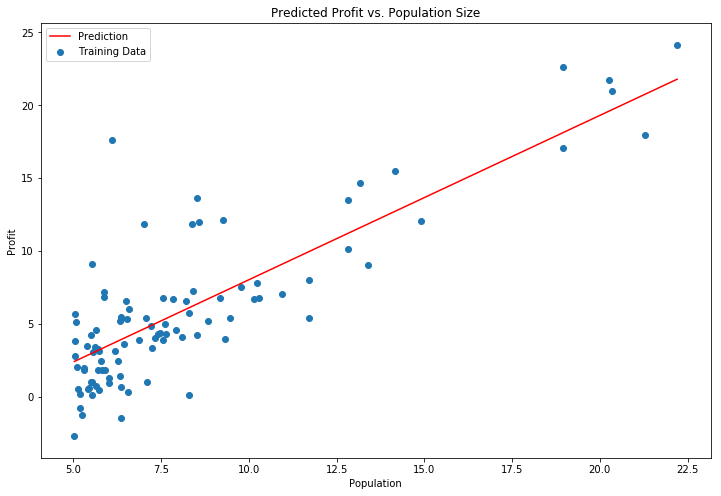

In [26]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] +(g[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

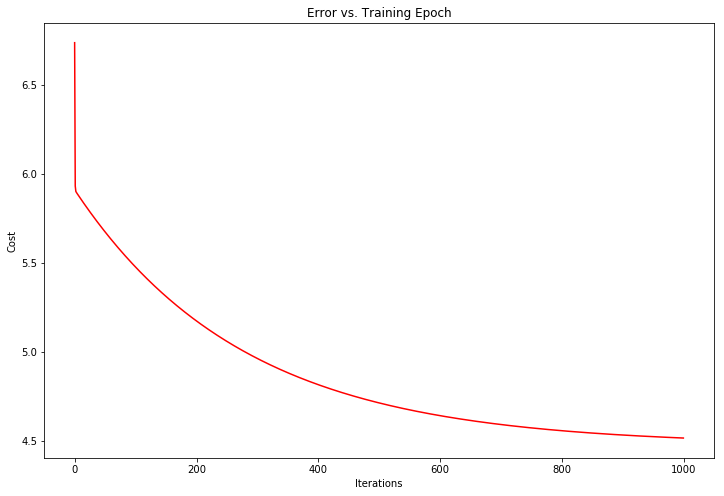

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')